In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from IPython.display import Image
from sklearn.model_selection import train_test_split

In [2]:
# Use the absolute path to the CSV file
file_path = '/Users/saheedadeitan/Downloads/BusyQA_bootcamp//winequality-red.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
# Display the first few rows of the DataFrame to verify the import
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [273]:
null_counts = df.isnull().sum()
null_counts

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [274]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [275]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [277]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [296]:

df.drop('quality', axis=1).columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [278]:
df.corr

<bound method DataFrame.corr of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

/var/folders/cb/37bc41z91fvfh58g85g7vb_r0000gn/T/ipykernel_36576/338889165.py:2: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.countplot(x='quality', hue='quality', data=df, palette=custom)


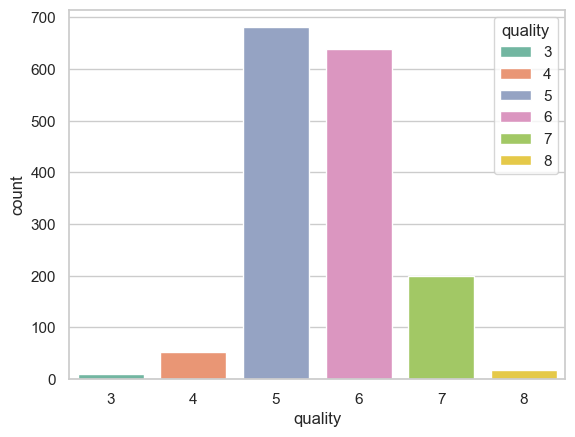

In [279]:
custom = sns.color_palette("Set2")
sns.countplot(x='quality', hue='quality', data=df, palette=custom)
plt.show()

/var/folders/cb/37bc41z91fvfh58g85g7vb_r0000gn/T/ipykernel_36576/573852456.py:5: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.boxplot(x='quality', y='pH', data= df, hue='quality', palette = custom)


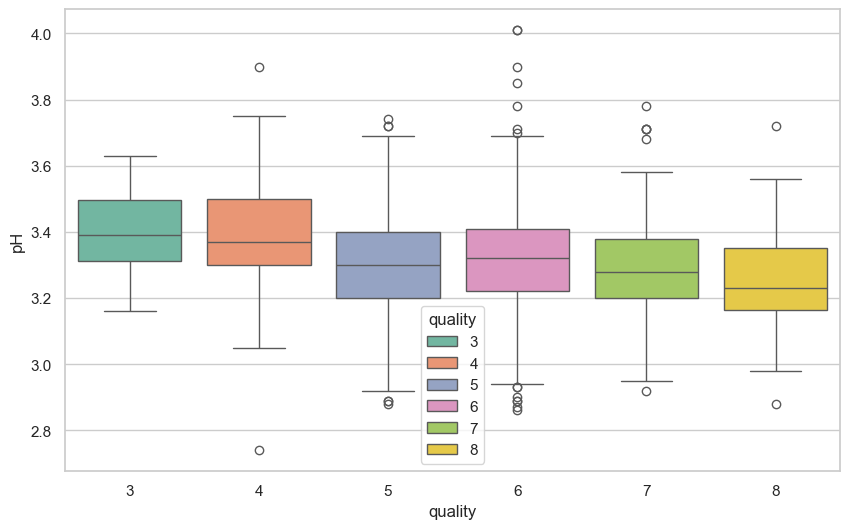

In [280]:
#Target variable is Quality. So will plot a boxplot each column against target variable

custom = sns.color_palette("Set2")
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='pH', data= df, hue='quality', palette = custom)
plt.show()

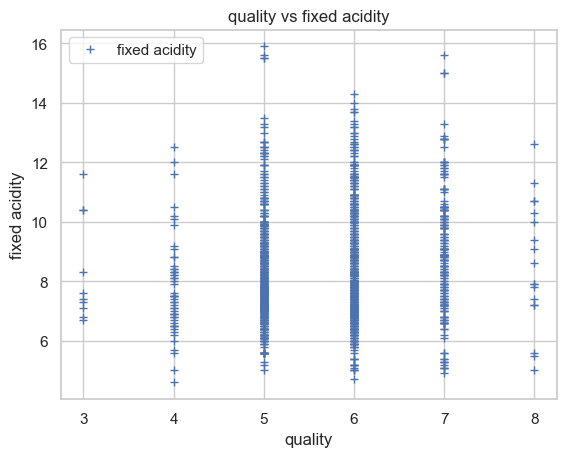

In [281]:
#Target variable is Quality. So will plot each column against target variable
df.plot(x='quality', y='fixed acidity', style='+')  
plt.title('quality vs fixed acidity')  
plt.xlabel('quality')  
plt.ylabel('fixed acidity')  
plt.show()

In [282]:
#splitting x and y variables
x = df.iloc[:,:11]
y = df['quality']

In [283]:
x.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [284]:
y.head(10)

0    5
1    5
2    5
3    6
4    5
5    5
6    5
7    7
8    7
9    5
Name: quality, dtype: int64

In [285]:
# scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [286]:
print(x)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [287]:
#train_test_split- train our model
from sklearn.model_selection import train_test_split
# Assuming 'x' is your feature matrix and 'y' is your target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1279, 11)
(1279,)
(320, 11)
(320,)


In [288]:
#for prediction, we use ML regression algorithm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [293]:
# Multiple Linear Regression ()

regressor = LinearRegression()
regressor.fit(x_train, y_train)

pred_test_reg = regressor.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_test_reg))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test_reg))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_reg))) 

Mean Absolute Error: 0.4696330928661114
Mean Squared Error: 0.3844711978201242
Root Mean Squared Error: 0.6200574149384266


In [290]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

5.650290803203522
[ 0.07185608 -0.20576977 -0.03464955  0.03928241 -0.08814491  0.02806237
 -0.09133765 -0.05946387 -0.03927691  0.15658226  0.28529377]


In [294]:
coeff_df = pd.DataFrame(regressor.coef_, df.drop('quality', axis=1).columns, columns=['Coefficient'])  
coeff_df

,Coefficient
fixed acidity,0.071856
volatile acidity,-0.205770
citric acid,-0.034650
residual sugar,0.039282
chlorides,-0.088145
free sulfur dioxide,0.028062
total sulfur dioxide,-0.091338
density,-0.059464
pH,-0.039277
sulphates,0.156582


In [297]:
# Lasso

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 


pred_test_lasso= model_lasso.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_test_lasso))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test_lasso))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_lasso)))

Mean Absolute Error: 0.47176295081300007
Mean Squared Error: 0.3854225834619259
Root Mean Squared Error: 0.6208241163662426


In [298]:
#Ridge
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 

pred_test_rr= rr.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_test_rr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test_rr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_rr)))

Mean Absolute Error: 0.4696331100166917
Mean Squared Error: 0.3844710886419417
Root Mean Squared Error: 0.6200573268996519


In [299]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(x_train, y_train) 

pred_test_enet= model_enet.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_test_enet))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test_enet))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_enet)))

Mean Absolute Error: 0.47018583714892304
Mean Squared Error: 0.38449453380702747
Root Mean Squared Error: 0.6200762322545732


In [300]:
# #KNN Regressor i need help

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(x_train, y_train)

x_pred_KNN =reg.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, x_pred_KNN))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, x_pred_KNN))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, x_pred_KNN)))

Mean Absolute Error: 0.4854166666666666
Mean Squared Error: 0.47222222222222215
Root Mean Squared Error: 0.6871842709362768


In [301]:
#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

dt_predict = dt.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_test_enet))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test_enet))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_enet)))

Mean Absolute Error: 0.47018583714892304
Mean Squared Error: 0.38449453380702747
Root Mean Squared Error: 0.6200762322545732


In [302]:
# Random Forest
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(x_train, y_train)

y_pred_RF = rf.predict(x_test) 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_RF))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_RF))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)))

Mean Absolute Error: 0.404371875
Mean Squared Error: 0.318066228125
Root Mean Squared Error: 0.563973605876197


In [303]:
# Model Name + Grid search
#Grid Search


# Create the parameter grid based 
# parameter value can be used according to data understanding 
param_grid = {
    'bootstrap': [True],
    'max_depth': [3,5,7],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [400,500,600]
    }

# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          scoring='neg_mean_squared_error', cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Best parameters
grid_search.best_params_

pred_grid_search = grid_search.predict(x_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_grid_search))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_grid_search))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_grid_search)))


Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=400; total time=   1.1s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=400; total time=   1.1s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=400; total time=   1.1s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   1.3s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   1.3s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   1.3s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=600; total time=   1.6s
[CV] END boots

In [304]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 7,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 400}

In [305]:
# Model Name + Random
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 6, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features, #put it to auto. you dont have to use it
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()


# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations(n_iter), and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)


# Fit the random search model
rf_random.fit(x_train, y_train)

pred_rf_random = rf_random.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_rf_random))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_rf_random))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_rf_random)))

{'n_estimators': [10, 55, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 4, 6, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_l

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
171 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12